In [12]:
import pandas as pd
import numpy as np


In [13]:
df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [14]:
df.shape

(9537, 11)

In [15]:
df.columns

Index(['session_id', 'network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access',
       'attack_detected'],
      dtype='object')

In [16]:
df['attack_detected'].value_counts()

,count
attack_detected,
0,5273
1,4264


In [17]:
df.isna().values.any()

True

In [18]:
df.isna().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [19]:
if 'encryption_used' in df.columns:
    df.drop(columns=['encryption_used'], axis = 1)


In [20]:
df.head()


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [21]:
df.shape

(9537, 11)

In [22]:
df.isna().sum()

,0
session_id,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0


In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [24]:
df['session_id'] = df['session_id'].astype(str).str.extract('(\d+)').astype(float)


In [25]:
categorical_cols = ['protocol_type', 'browser_type', 'encryption_used']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

In [26]:
X = df.drop('attack_detected', axis = 1)
y = df['attack_detected']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Mean Squared Error: 0.18
Mean Absolute Error: 0.18
Accuracy: 0.82


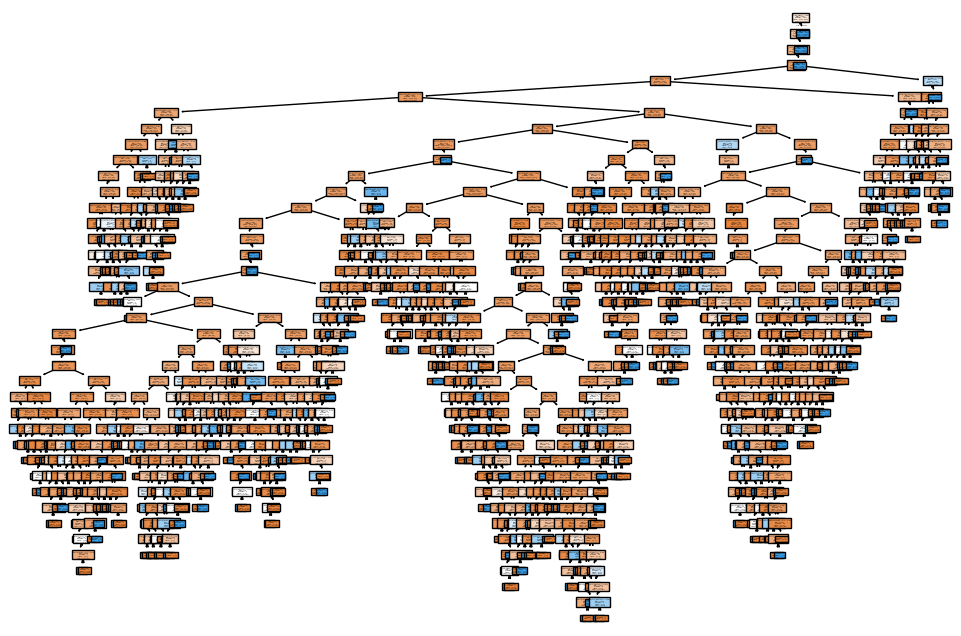

In [30]:
plt.figure(figsize=(12, 8))
plot_tree(classifier, feature_names=X.columns, class_names=['No Attack', 'Attack'], filled=True)
plt.show()

In [31]:
from sklearn.tree import export_text

tree_model = classifier.fit(X_train, y_train)
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)

|--- failed_logins <= 0.95
|   |--- login_attempts <= 1.27
|   |   |--- ip_reputation_score <= 1.49
|   |   |   |--- browser_type <= 2.16
|   |   |   |   |--- session_duration <= 2.32
|   |   |   |   |   |--- network_packet_size <= -1.45
|   |   |   |   |   |   |--- network_packet_size <= -1.55
|   |   |   |   |   |   |   |--- session_duration <= 0.39
|   |   |   |   |   |   |   |   |--- ip_reputation_score <= 1.46
|   |   |   |   |   |   |   |   |   |--- network_packet_size <= -1.82
|   |   |   |   |   |   |   |   |   |   |--- session_duration <= -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- session_duration >  -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- network_packet_size >  -1.82
|   |   |   |   |   |   |   |   |   |   |--- session_id <= 1.19
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |  

TYPES OF DECISION TREES

In [32]:
# Train Decision Tree using Gini Impurity (CART)

cart_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_tree.fit(X_train, y_train)

cart_accuracy = cart_tree.score(X_test, y_test)
print(f"\nCART (Gini Impurity) Accuracy: {cart_accuracy:.2f}")



CART (Gini Impurity) Accuracy: 0.82


In [33]:
cart_rules = export_text(cart_tree, feature_names=list(X.columns))
print("\n--- Rules for CART (Gini Impurity) ---")
print(cart_rules)


--- Rules for CART (Gini Impurity) ---
|--- failed_logins <= 0.95
|   |--- login_attempts <= 1.27
|   |   |--- ip_reputation_score <= 1.49
|   |   |   |--- browser_type <= 2.16
|   |   |   |   |--- session_duration <= 2.32
|   |   |   |   |   |--- network_packet_size <= -1.45
|   |   |   |   |   |   |--- network_packet_size <= -1.55
|   |   |   |   |   |   |   |--- session_duration <= 0.39
|   |   |   |   |   |   |   |   |--- ip_reputation_score <= 1.46
|   |   |   |   |   |   |   |   |   |--- network_packet_size <= -1.82
|   |   |   |   |   |   |   |   |   |   |--- session_duration <= -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- session_duration >  -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- network_packet_size >  -1.82
|   |   |   |   |   |   |   |   |   |   |--- session_id <= 1.19
|   |   |   |   |   |   |   |   |   |   |   |--- truncated b

In [34]:
# Train Decision Tree using Entropy (ID3)

id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_tree.fit(X_train, y_train)

id3_accuracy = id3_tree.score(X_test, y_test)
print(f"\nID3 (Entropy) Accuracy: {id3_accuracy:.2f}")



ID3 (Entropy) Accuracy: 0.82


In [35]:
id3_rules = export_text(id3_tree, feature_names=list(X.columns))
print("\n--- Rules for ID3 (Entropy) ---")
print(id3_rules)


--- Rules for ID3 (Entropy) ---
|--- failed_logins <= 0.95
|   |--- login_attempts <= 1.27
|   |   |--- ip_reputation_score <= 1.49
|   |   |   |--- browser_type <= 2.16
|   |   |   |   |--- session_duration <= 0.70
|   |   |   |   |   |--- session_duration <= 0.66
|   |   |   |   |   |   |--- encryption_used <= -0.28
|   |   |   |   |   |   |   |--- network_packet_size <= 1.66
|   |   |   |   |   |   |   |   |--- network_packet_size <= 0.96
|   |   |   |   |   |   |   |   |   |--- session_id <= 1.01
|   |   |   |   |   |   |   |   |   |   |--- session_id <= 0.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 25
|   |   |   |   |   |   |   |   |   |   |--- session_id >  0.27
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 19
|   |   |   |   |   |   |   |   |   |--- session_id >  1.01
|   |   |   |   |   |   |   |   |   |   |--- ip_reputation_score <= -1.48
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |

In [36]:
# Train Decision Tree with Random Feature Selection (70% of features)

random_features_tree = DecisionTreeClassifier(max_features=0.7, random_state=42)
random_features_tree.fit(X_train, y_train)

random_features_accuracy = random_features_tree.score(X_test, y_test)
print(f"\nRandom Feature Selection Accuracy: {random_features_accuracy:.2f}")



Random Feature Selection Accuracy: 0.82


In [37]:
random_features_rules = export_text(random_features_tree, feature_names=list(X.columns))
print("\n--- Rules for Random Feature Selection (70% Features) ---")
print(random_features_rules)


--- Rules for Random Feature Selection (70% Features) ---
|--- login_attempts <= 1.27
|   |--- failed_logins <= 0.95
|   |   |--- session_duration <= 0.55
|   |   |   |--- ip_reputation_score <= 1.49
|   |   |   |   |--- browser_type <= 2.16
|   |   |   |   |   |--- encryption_used <= -0.28
|   |   |   |   |   |   |--- ip_reputation_score <= 1.23
|   |   |   |   |   |   |   |--- network_packet_size <= -0.35
|   |   |   |   |   |   |   |   |--- session_id <= 1.20
|   |   |   |   |   |   |   |   |   |--- session_id <= 0.17
|   |   |   |   |   |   |   |   |   |   |--- browser_type <= 1.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |   |--- browser_type >  1.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- session_id >  0.17
|   |   |   |   |   |   |   |   |   |   |--- network_packet_size <= -0.39
|   |   |   |   |   |   |   |   |   |   |   |--- tr

In [38]:
# Train Decision Tree with Pre-Pruning (Max Depth = 4)

pre_pruned_tree = DecisionTreeClassifier(max_depth=4, random_state=42)
pre_pruned_tree.fit(X_train, y_train)

pre_pruned_accuracy = pre_pruned_tree.score(X_test, y_test)
print(f"\nPre-Pruned Tree Accuracy: {pre_pruned_accuracy:.2f}")



Pre-Pruned Tree Accuracy: 0.88


In [39]:
pre_pruned_rules = export_text(pre_pruned_tree, feature_names=list(X.columns))
print("\n--- Rules for Pre-Pruned Tree (Max Depth = 4) ---")
print(pre_pruned_rules)


--- Rules for Pre-Pruned Tree (Max Depth = 4) ---
|--- failed_logins <= 0.95
|   |--- login_attempts <= 1.27
|   |   |--- ip_reputation_score <= 1.49
|   |   |   |--- browser_type <= 2.16
|   |   |   |   |--- class: 0
|   |   |   |--- browser_type >  2.16
|   |   |   |   |--- class: 1
|   |   |--- ip_reputation_score >  1.49
|   |   |   |--- class: 1
|   |--- login_attempts >  1.27
|   |   |--- class: 1
|--- failed_logins >  0.95
|   |--- class: 1



IREP ALGORITHM

In [43]:
def prune_tree(tree, X_train, y_train, X_prune, y_prune, preprocessor):
    """Prune the decision tree based on validation set performance."""
    best_tree = tree
    X_prune_transformed = preprocessor.transform(X_prune)
    best_accuracy = accuracy_score(y_prune, best_tree.predict(X_prune_transformed))

    for depth in range(1, tree.get_depth()):
        pruned_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
        X_train_transformed = preprocessor.transform(X_train)
        pruned_tree.fit(X_train_transformed, y_train)
        accuracy = accuracy_score(y_prune, pruned_tree.predict(X_prune_transformed))

        if accuracy >= best_accuracy:
            best_tree = pruned_tree
            best_accuracy = accuracy

    return best_tree


In [44]:
def visualize_tree(tree, feature_names, title="Decision Tree"):
    """Visualize the decision tree."""
    plt.figure(figsize=(20, 10))
    plot_tree(tree, feature_names=feature_names, filled=True, rounded=True, class_names=tree.classes_.astype(str))
    plt.title(title)
    plt.show()


In [45]:
def IREPPosNeg(tree_model, X_train, y_train, X_test, y_test, preprocessor):
    """Implements the IREP rule-learning algorithm with pruning."""
    X_train_main, X_prune, y_train_main, y_prune = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
    pruned_tree = prune_tree(tree_model, X_train_main, y_train_main, X_prune, y_prune, preprocessor)

    X_test_transformed = preprocessor.transform(X_test)
    y_pred_pruned = pruned_tree.predict(X_test_transformed)

    print("\nClassification Report (After IREP Pruning):\n", classification_report(y_test, y_pred_pruned))

    rules_after = export_text(pruned_tree, feature_names=preprocessor.get_feature_names_out())
    print("\nExtracted Rules After Pruning:\n", rules_after)

    # Visualize the normal tree
    print("\nVisualizing Normal Tree:")
    visualize_tree(tree_model, preprocessor.get_feature_names_out(), title="Original Decision Tree")

    # Visualize the pruned tree
    print("\nVisualizing Pruned Tree:")
    visualize_tree(pruned_tree, preprocessor.get_feature_names_out(), title="Pruned Decision Tree")

    return pruned_tree



Classification Report (After IREP Pruning):
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1042
           1       0.80      0.82      0.81       866

    accuracy                           0.82      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.82      0.82      0.82      1908


Extracted Rules After Pruning:
 |--- x7 <= 0.95
|   |--- x3 <= 1.27
|   |   |--- x6 <= 1.49
|   |   |   |--- x8 <= 2.16
|   |   |   |   |--- x4 <= 2.32
|   |   |   |   |   |--- x1 <= -1.45
|   |   |   |   |   |   |--- x1 <= -1.55
|   |   |   |   |   |   |   |--- x4 <= 0.39
|   |   |   |   |   |   |   |   |--- x6 <= 1.46
|   |   |   |   |   |   |   |   |   |--- x1 <= -1.82
|   |   |   |   |   |   |   |   |   |   |--- x4 <= -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- x4 >  -0.99
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
| 

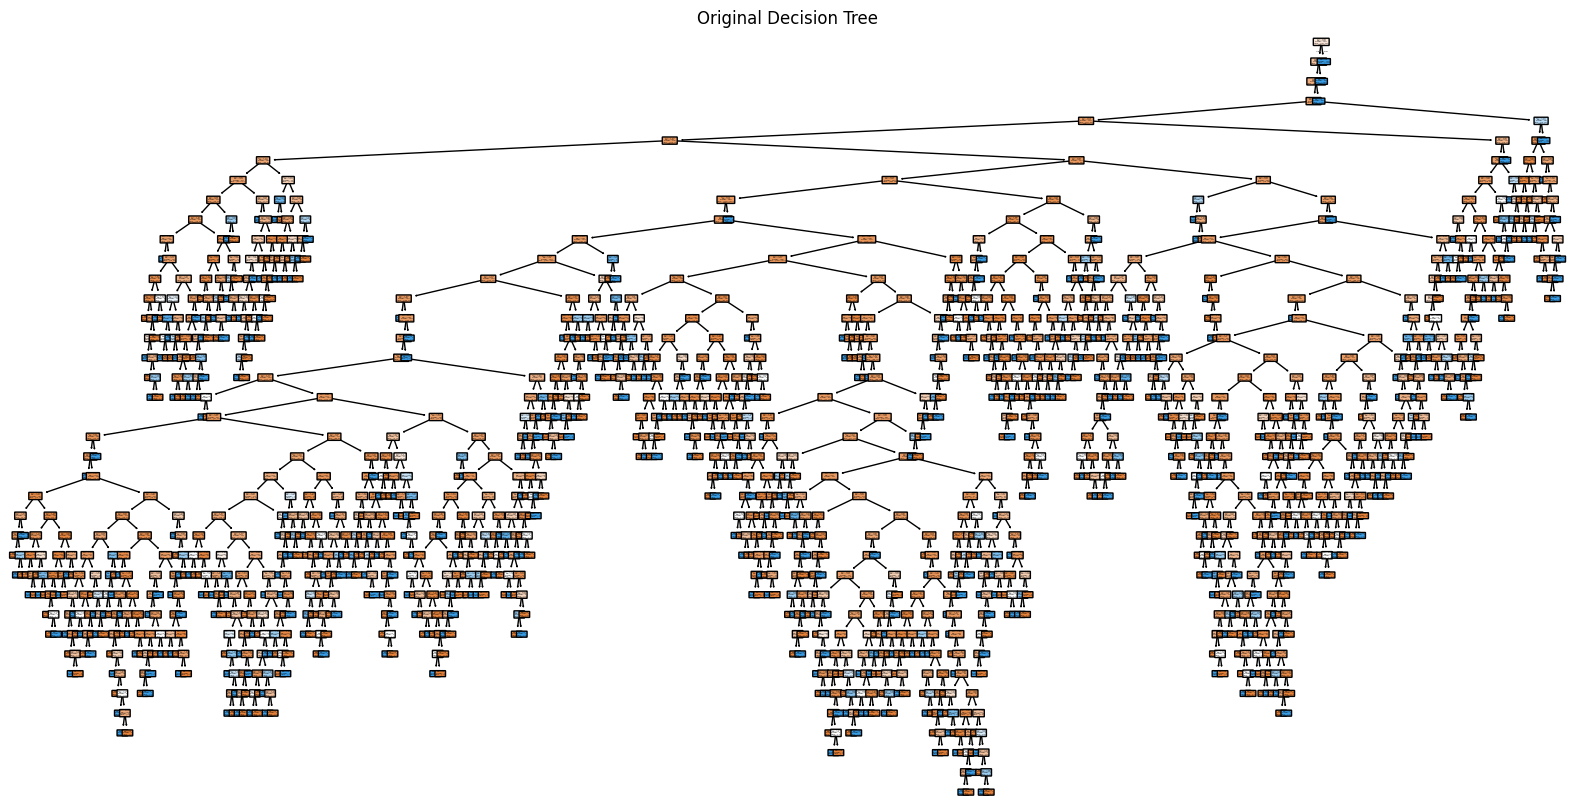


Visualizing Pruned Tree:


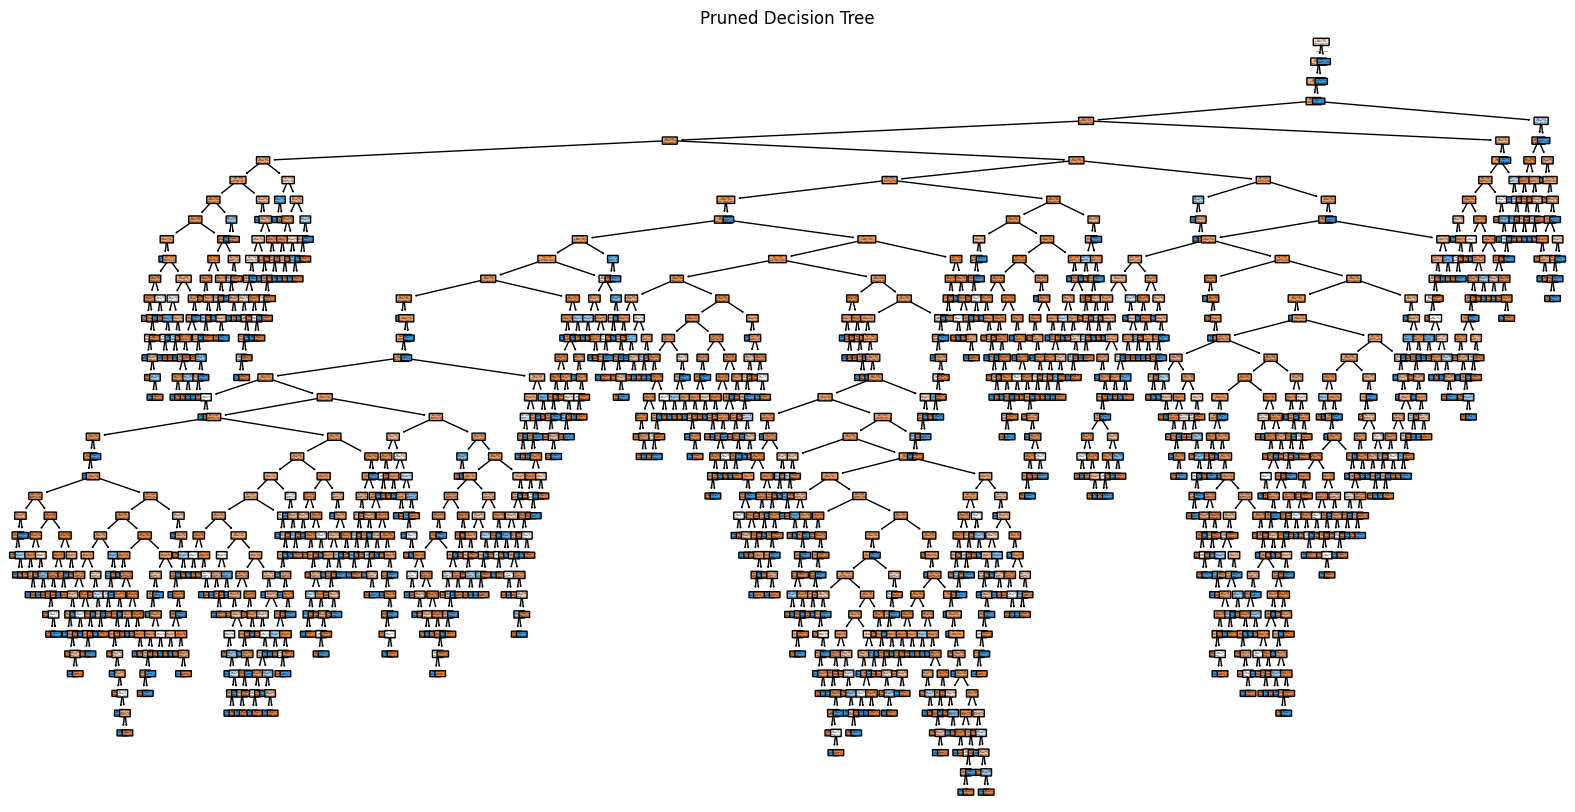

In [46]:
# Train a decision tree model
tree_model = DecisionTreeClassifier(criterion="gini", random_state=42)
tree_model.fit(X_train, y_train)

# Preprocessing pipeline
preprocessor = StandardScaler()
preprocessor.fit(X_train)

# Apply IREP pruning
pruned_tree = IREPPosNeg(tree_model, X_train, y_train, X_test, y_test, preprocessor)
